# Objetivo

Utilizar um [dataset sobre pessoas com AVC](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/) e tentar prever quais pessoas terão a doença dado um conjunto de dados.

Primeiramente, realizaremos uma análise exploratória dos dados.

In [34]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/santander-coders-2023/ml1/healthcare-dataset-stroke-data.csv")

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [13]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [17]:
df.duplicated().sum()

0

# Gênero

## Dados gerais sobre gênero

In [22]:
df["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [25]:
df["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Text(0, 0.5, 'QTD')

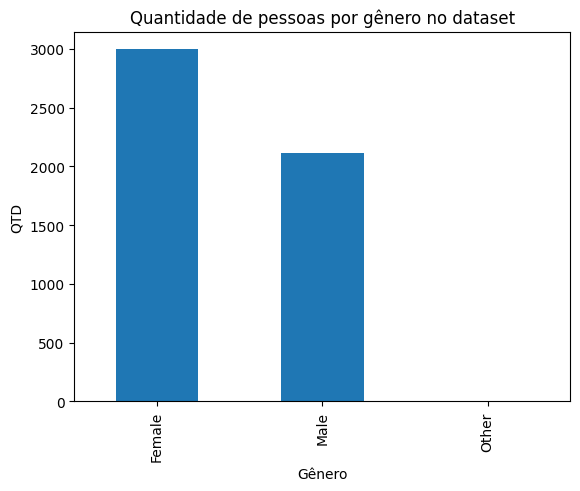

In [50]:
df["gender"].value_counts().plot(kind="bar")
plt.title("Quantidade de pessoas por gênero no dataset")
plt.xlabel("Gênero")
plt.ylabel("QTD")

## Pessoas com AVC

In [28]:
df[df["stroke"] == 1]["gender"].value_counts()

Female    141
Male      108
Name: gender, dtype: int64

Text(0, 0.5, 'QTD')

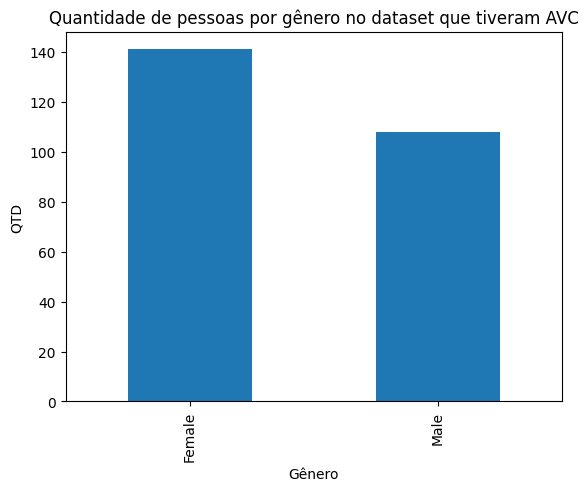

In [51]:
df[df["stroke"] == 1]["gender"].value_counts().plot(kind="bar")
plt.title("Quantidade de pessoas por gênero no dataset que tiveram AVC")
plt.xlabel("Gênero")
plt.ylabel("QTD")

Percentualmente:

In [32]:
# Porcentagem de mulheres com AVC:
avc_f_p = (df[df["stroke"] == 1]["gender"].value_counts()[0]/df["gender"].value_counts()[0])*100
print(avc_f_p)

4.709418837675351


In [33]:
# Porcentagem de homens com AVC:
avc_m_p = (df[df["stroke"] == 1]["gender"].value_counts()[1]/df["gender"].value_counts()[1])*100
print(avc_m_p)

5.106382978723404


Text(0, 0.5, 'QTD')

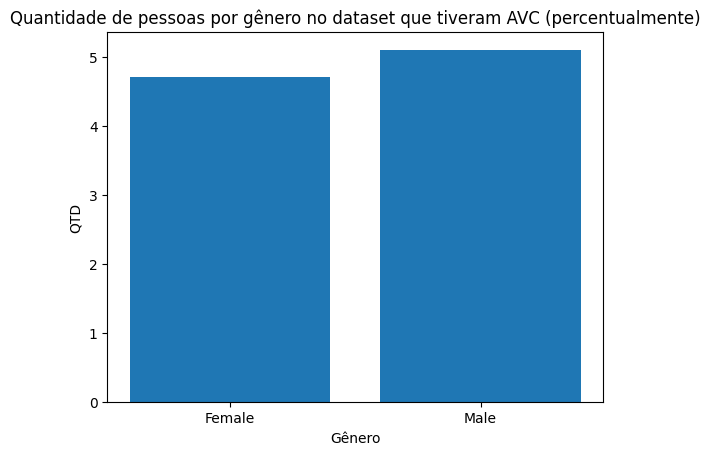

In [52]:
plt.bar(["Female", "Male"], [avc_f_p, avc_m_p])
plt.title("Quantidade de pessoas por gênero no dataset que tiveram AVC (percentualmente)")
plt.xlabel("Gênero")
plt.ylabel("QTD")

## Pessoas sem AVC

In [40]:
df[df["stroke"] == 0]["gender"].value_counts()

Female    2853
Male      2007
Other        1
Name: gender, dtype: int64

Text(0, 0.5, 'QTD')

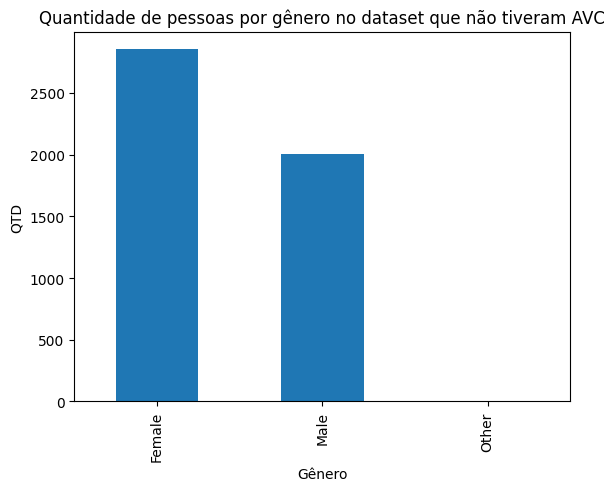

In [53]:
df[df["stroke"] == 0]["gender"].value_counts().plot(kind="bar")
plt.title("Quantidade de pessoas por gênero no dataset que não tiveram AVC")
plt.xlabel("Gênero")
plt.ylabel("QTD")

Percentualmente:

In [42]:
# Porcentagem de mulheres sem AVC:
n_avc_f_p = (df[df["stroke"] == 0]["gender"].value_counts()[0]/df["gender"].value_counts()[0])*100
print(n_avc_f_p)

95.29058116232466


In [43]:
# Porcentagem de homens sem AVC:
n_avc_m_p = (df[df["stroke"] == 0]["gender"].value_counts()[1]/df["gender"].value_counts()[1])*100
print(n_avc_m_p)

94.8936170212766


Text(0, 0.5, 'QTD')

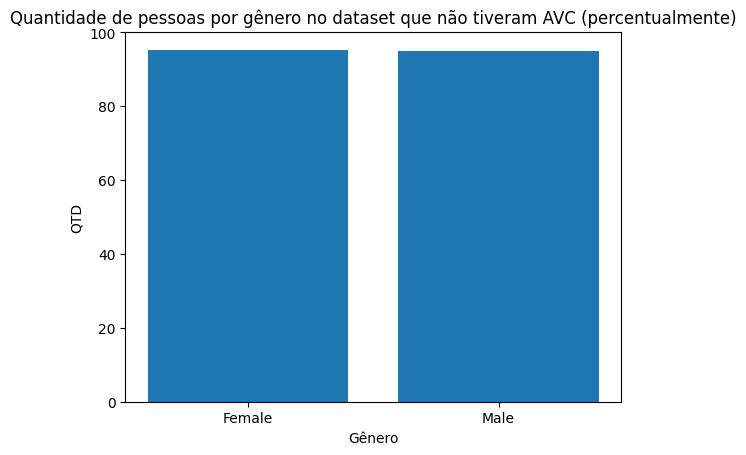

In [54]:
plt.bar(["Female", "Male"], [n_avc_f_p, n_avc_m_p])
plt.title("Quantidade de pessoas por gênero no dataset que não tiveram AVC (percentualmente)")
plt.xlabel("Gênero")
plt.ylabel("QTD")

## Conclusão

* Proporcionalmente, não há uma diferença significativa entre homens e mulheres que tiveram AVC.

# Idade

Text(0, 0.5, 'Frequência')

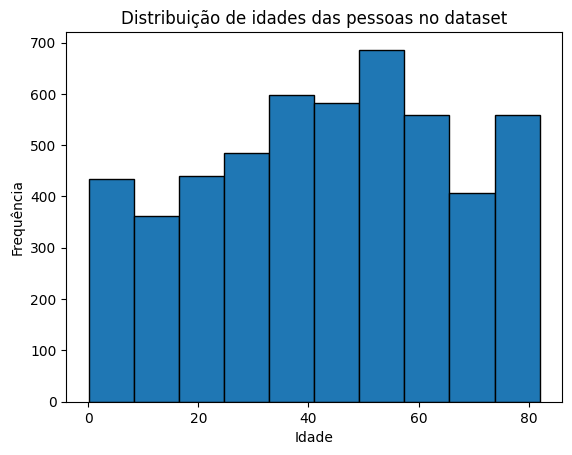

In [56]:
df["age"].plot(kind="hist", edgecolor="black")
plt.title("Distribuição de idades das pessoas no dataset")
plt.xlabel("Idade")
plt.ylabel("Frequência")

## Pessoas com AVC:

Text(0, 0.5, 'Frequência')

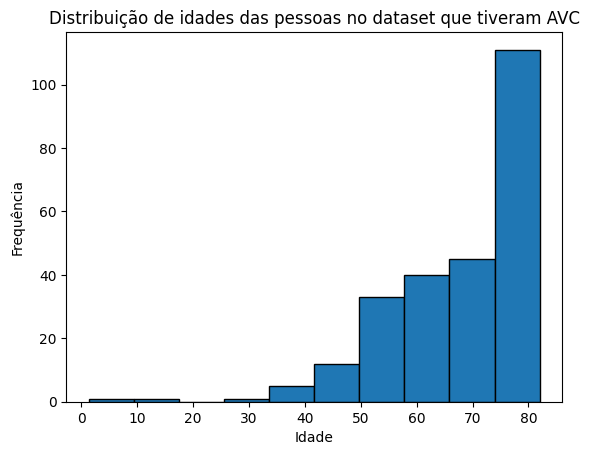

In [57]:
df[df["stroke"] == 1]["age"].plot(kind="hist", edgecolor="black")
plt.title("Distribuição de idades das pessoas no dataset que tiveram AVC")
plt.xlabel("Idade")
plt.ylabel("Frequência")

Nos perguntando sobre probabilidade:

In [66]:
qtd_avc = len(df[df["stroke"] == 1])
qtd_avc_mais_50 = len(df[(df["stroke"] == 1) & (df["age"] > 50)])

# Qual a probabilidade de encontrar uma pessoa que teve AVC e que tenha mais de 50 anos?
(qtd_avc_mais_50 / qtd_avc)*100

90.76305220883533

## Pessoas sem AVC:

Text(0, 0.5, 'Frequência')

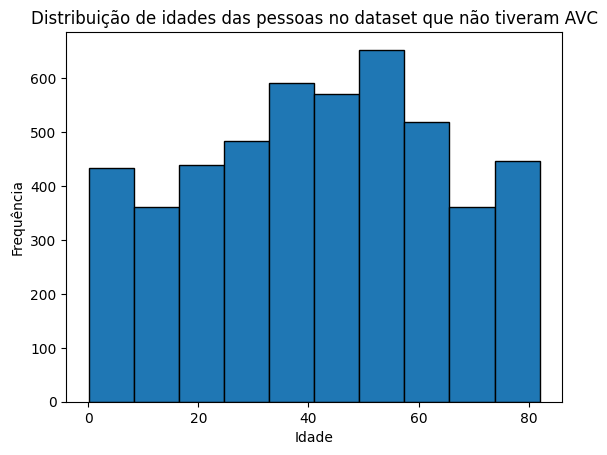

In [58]:
df[df["stroke"] == 0]["age"].plot(kind="hist", edgecolor="black")
plt.title("Distribuição de idades das pessoas no dataset que não tiveram AVC")
plt.xlabel("Idade")
plt.ylabel("Frequência")

## Conclusão

* O histograma de idades nos mostra que há uma crescente significativa no número de casos para pessoas com AVC quanto mais velha ela se torna.
* Mais de 90% da população com AVC tem 50 anos ou mais.

# Contribuições do professor

In [69]:
df.corr()

<ipython-input-69-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [71]:
df.corr(method = "spearman")

<ipython-input-71-48a88d9e9da4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = "spearman")


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003741,0.003553,-0.001205,-0.053058,0.008945,0.006499
age,0.003741,1.000000,0.280647,0.269627,0.145168,0.375650,0.249531
hypertension,0.003553,0.280647,1.000000,0.108306,0.114041,0.167493,0.127904
heart_disease,-0.001205,0.269627,0.108306,1.000000,0.106360,0.066144,0.134914
avg_glucose_level,-0.053058,0.145168,0.114041,0.106360,1.000000,0.114370,0.082541
bmi,0.008945,0.375650,0.167493,0.066144,0.114370,1.000000,0.055445
stroke,0.006499,0.249531,0.127904,0.134914,0.082541,0.055445,1.000000


Analisando só a coluna `work_type`:

In [75]:
df2 = pd.get_dummies(df, columns=["work_type"])
df2

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046,Male,67.0,0,1,Yes,Urban,228.69,36.6,formerly smoked,1,0,0,1,0,0
1,51676,Female,61.0,0,0,Yes,Rural,202.21,NaN,never smoked,1,0,0,0,1,0
2,31112,Male,80.0,0,1,Yes,Rural,105.92,32.5,never smoked,1,0,0,1,0,0
3,60182,Female,49.0,0,0,Yes,Urban,171.23,34.4,smokes,1,0,0,1,0,0
4,1665,Female,79.0,1,0,Yes,Rural,174.12,24.0,never smoked,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Urban,83.75,NaN,never smoked,0,0,0,1,0,0
5106,44873,Female,81.0,0,0,Yes,Urban,125.20,40.0,never smoked,0,0,0,0,1,0
5107,19723,Female,35.0,0,0,Yes,Rural,82.99,30.6,never smoked,0,0,0,0,1,0
5108,37544,Male,51.0,0,0,Yes,Rural,166.29,25.6,formerly smoked,0,0,0,1,0,0
